# Chapter 25 - Phase Response Curves
Phase response curves 

In [1]:
import numpy as np
import logging

from bmtk.builder.networks import NetworkBuilder

net = NetworkBuilder('network')
net.add_nodes(N=1,pop_name='RTM',     
        model_type='biophysical',
        model_template='hoc:RTMExcCell',  # WBInhCell hoc definition
        morphology='blank.swc')

c:\users\strou\anaconda3\envs\py2env\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
net.build()
net.save_nodes(output_dir='network')

In [3]:
extnet = NetworkBuilder('extnet')
extnet.add_nodes(N=1,pop_name='Inp',
            potential='exc',
            model_type='virtual')

In [4]:
extnet.add_edges(source={'pop_name':'Inp'}, target=net.nodes(),
                   connection_rule=1,
                   syn_weight=0.195,               #synaptic weight specified in Borger's book ch 23
                   delay=5,
                   weight_function=None,
                   target_sections=['soma'],
                   distance_range=[0.0, 150.0],
                   dynamics_params='PING_ExcToExc.json',
                   model_template='exp2syn')

In [5]:
extnet.build()
extnet.save_nodes(output_dir='network')
extnet.save_edges(output_dir='network')

In [ ]:
from bmtk.utils.reports.spike_trains import SpikeTrains

spikes = SpikeTrains(population='extnet')
spikes.add_spikes(node_ids=0, 
                    timestamps=[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800])
spikes.to_sonata('input/ConstantSpike.h5')

In [6]:
from bmtk.utils.sim_setup import build_env_bionet

build_env_bionet(base_dir='.',      # Where to save the scripts and config files
                 network_dir='network',    # Location of directory containing network files
                 tstop=1050.0, dt=0.1,     # Run a simulation for 2000 ms at 0.1 ms intervals
                 report_vars=['v'], # Tells simulator we want to record membrane potential and calcium traces
                 current_clamp={           # Creates a step current from 500.ms to 1500.0 ms
                     'amp': 0.3,
                     'delay': 50.0,
                     'duration': 1000.0
                 },
                 #spikes_inputs=[('extnet',   # Name of population which spikes will be generated for
                                #'input/ConstantSpike.h5')],
                 include_examples=False,    # Copies components files
                 compile_mechanisms=False   # Will try to compile NEURON mechanisms
                )

In [7]:
from bmtk.simulator import bionet


conf = bionet.Config.from_json('simulation_config.json')
conf.build_env()
net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)
sim.run()

2021-01-15 19:59:36,016 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


2021-01-15 19:59:36,121 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2021-01-15 19:59:36,150 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


2021-01-15 19:59:36,183 [INFO] Running simulation for 1050.000 ms with the time step 0.100 ms


INFO:NEURONIOUtils:Running simulation for 1050.000 ms with the time step 0.100 ms


2021-01-15 19:59:36,207 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2021-01-15 19:59:36,239 [INFO] Block save every 5000 steps


INFO:NEURONIOUtils:Block save every 5000 steps


2021-01-15 19:59:36,387 [INFO]     step:5000 t_sim:500.00 ms


INFO:NEURONIOUtils:    step:5000 t_sim:500.00 ms


2021-01-15 19:59:36,526 [INFO]     step:10000 t_sim:1000.00 ms


INFO:NEURONIOUtils:    step:10000 t_sim:1000.00 ms


2021-01-15 19:59:36,565 [INFO]     step:10500 t_sim:1050.00 ms


INFO:NEURONIOUtils:    step:10500 t_sim:1050.00 ms


2021-01-15 19:59:36,604 [INFO] Simulation completed in 0.421 seconds 


INFO:NEURONIOUtils:Simulation completed in 0.421 seconds 


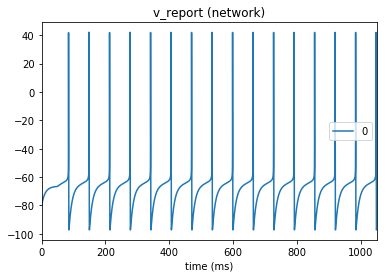

In [12]:
from bmtk.analyzer.compartment import plot_traces


_ = plot_traces(config_file='simulation_config.json', node_ids=[0], report_name='v_report')

In [17]:
from bmtk.utils.reports.spike_trains import SpikeTrains

spikes = SpikeTrains.load('output/spikes.h5', population='network')

In [18]:
node0_times = spikes.get_times(node_id=0)
print(node0_times)

[  84.2  148.5  212.8  277.1  341.4  405.7  470.   534.3  598.6  662.9
  727.2  791.5  855.8  920.1  984.4 1048.7]
